## Loan Repayment Prediction

#### Projede kredi alanların geri ödeme yapıp yapmayacağını tahmin eden model oluşturmamız isteniyor. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [3]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,NaN,2 years,Rent,NaN,Debt Consolidation,"$1,706.58",19.9,NaN,16,0,43992,44080,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10+ years,Own Home,77186.0,Debt Consolidation,"$1,376.47",19.1,47.0,9,0,1717,9758,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,7460.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9 years,Home Mortgage,52504.0,Debt Consolidation,$297.96,15.1,82.0,8,0,3315,20090,0.0,0.0
256983,ffffe32e-ed17-459f-9cfd-7b9ee7972933,97281336-1e45-41d2-acb2-263ce56a590e,Fully Paid,27902,Long Term,678.0,10+ years,Home Mortgage,117480.0,Debt Consolidation,"$2,525.82",18.0,11.0,10,0,28317,62371,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.isnull().sum().sort_values(ascending=False)

Months since last delinquent    140383
Credit Score                     61676
Annual Income                    61676
Years in current job             11476
Bankruptcies                       529
Tax Liens                           23
Home Ownership                       0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Loan ID                              0
dtype: int64

In [6]:
df['Monthly Debt']=df['Monthly Debt'].str.replace('[$]','')
#df['Monthly Debt']=df['Monthly Debt'].str.replace(",", ".")
df['Monthly Debt']

0            584.03
1         1,106.04 
2         1,321.85 
3            751.92
4            355.18
            ...    
256979    1,706.58 
256980    1,376.47 
256981       297.96
256982       297.96
256983    2,525.82 
Name: Monthly Debt, Length: 256984, dtype: object

In [7]:
df['Monthly Debt']=df['Monthly Debt'].str.replace(',','')
df['Monthly Debt']

0           584.03
1         1106.04 
2         1321.85 
3           751.92
4           355.18
            ...   
256979    1706.58 
256980    1376.47 
256981      297.96
256982      297.96
256983    2525.82 
Name: Monthly Debt, Length: 256984, dtype: object

In [8]:
df['Monthly Debt']=df['Monthly Debt'].astype(float)

In [9]:
df['Monthly Debt']=df['Monthly Debt'].astype(int)

In [10]:
df['Years in current job']=df['Years in current job'].str.replace('years',' ')
df['Years in current job']

0         10+  
1           4  
2         10+  
3         10+  
4           4  
          ...  
256979      2  
256980    10+  
256981      9  
256982      9  
256983    10+  
Name: Years in current job, Length: 256984, dtype: object

In [11]:
df['Years in current job']=df['Years in current job'].str.replace('+',' ')
df['Years in current job']

0         10   
1           4  
2         10   
3         10   
4           4  
          ...  
256979      2  
256980    10   
256981      9  
256982      9  
256983    10   
Name: Years in current job, Length: 256984, dtype: object

In [12]:
df['Years in current job']=df['Years in current job'].str.replace(' year',' ')

In [13]:
df['Years in current job']=df['Years in current job'].str.replace('<',' ')

In [14]:
df['Years in current job'].astype(float)

0         10.0
1          4.0
2         10.0
3         10.0
4          4.0
          ... 
256979     2.0
256980    10.0
256981     9.0
256982     9.0
256983    10.0
Name: Years in current job, Length: 256984, dtype: float64

In [15]:
df['Years in current job']=df['Years in current job'].fillna(df['Years in current job'].median())

In [16]:
df['Years in current job'].astype(int)

0         10
1          4
2         10
3         10
4          4
          ..
256979     2
256980    10
256981     9
256982     9
256983    10
Name: Years in current job, Length: 256984, dtype: int32

In [17]:
df.drop_duplicates(subset=['Loan ID','Customer ID'],inplace=True) #Tekrar edenleri kaldıralım. #256983'den 215700 satıra düştü.

In [18]:
df['Loan Status'].describe()

count         215700
unique             2
top       Fully Paid
freq          176191
Name: Loan Status, dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       215700 non-null  object 
 1   Customer ID                   215700 non-null  object 
 2   Loan Status                   215700 non-null  object 
 3   Current Loan Amount           215700 non-null  int64  
 4   Term                          215700 non-null  object 
 5   Credit Score                  160692 non-null  float64
 6   Years in current job          215700 non-null  object 
 7   Home Ownership                215700 non-null  object 
 8   Annual Income                 160692 non-null  float64
 9   Purpose                       215700 non-null  object 
 10  Monthly Debt                  215700 non-null  int32  
 11  Years of Credit History       215700 non-null  float64
 12  Months since last delinquent  97438 non-null

Positive examples= 176191
Negative examples= 39509


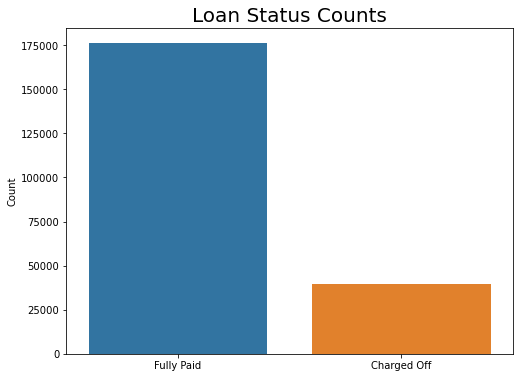

In [20]:
pos = df[df["Loan Status"] == 'Fully Paid'].shape[0]
neg = df[df["Loan Status"] == 'Charged Off'].shape[0]
print(f"Positive examples= {pos}")
print(f"Negative examples= {neg}")

plt.figure(figsize=(8, 6))
sns.countplot(df["Loan Status"])
plt.xticks((0, 1), ["Fully Paid", "Charged Off"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Loan Status Counts", y=1, fontdict={"fontsize": 20});

Text(0, 0.5, 'Count of Charged Off')

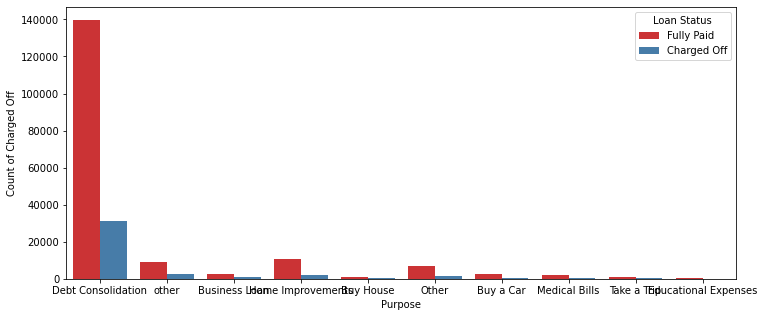

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x='Purpose',hue=df["Loan Status"],data=df,palette='Set1')
plt.ylabel("Count of Charged Off")

In [22]:
df['Purpose']=df['Purpose'].str.replace('other','Other')

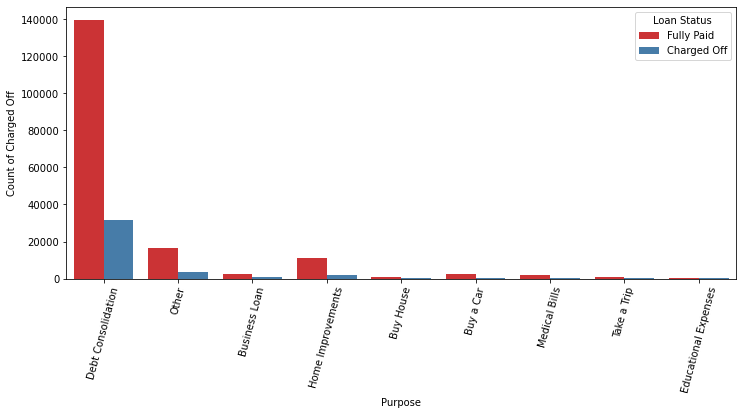

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x='Purpose',hue=df["Loan Status"],data=df,palette='Set1')
plt.ylabel("Count of Charged Off")
plt.xticks(rotation=75);

In [24]:
df['Bankruptcies'].nunique() , df['Tax Liens'].nunique()

(8, 12)

<AxesSubplot:xlabel='Bankruptcies', ylabel='count'>

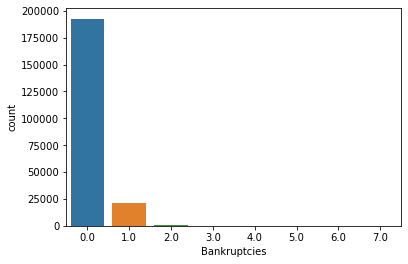

In [25]:
sns.countplot(df["Bankruptcies"])

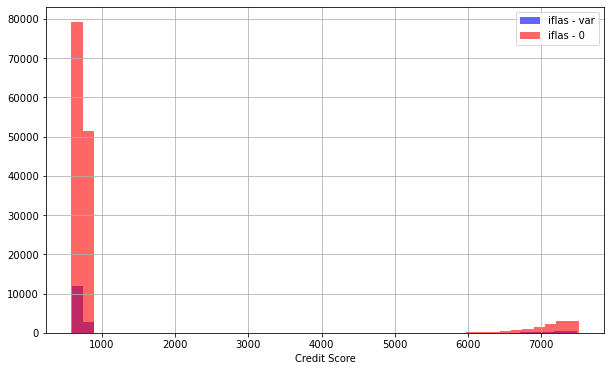

In [26]:
plt.figure(figsize=(10,6))
df[df['Bankruptcies']==1]['Credit Score'].hist(bins=45,color='blue',label='iflas - var',alpha=0.6)
df[df['Bankruptcies']==0]['Credit Score'].hist(bins=45,color='red',label='iflas - 0',alpha=0.6)
plt.xlabel("Credit Score")
plt.legend()

In [27]:
df['Years of Credit History'].astype(int)

0         12
1         26
2         28
3         26
4         11
          ..
256977    11
256979    19
256980    19
256981    15
256983    18
Name: Years of Credit History, Length: 215700, dtype: int32

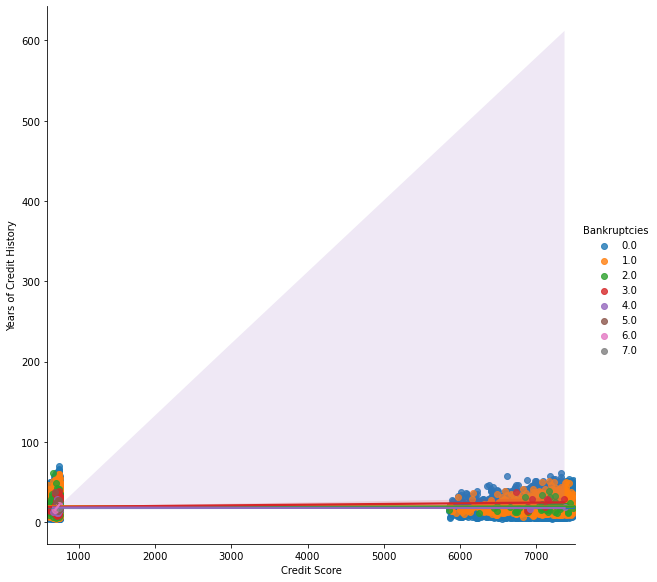

In [28]:
sns.lmplot(x='Credit Score',y='Years of Credit History',data=df,hue='Bankruptcies',height=8)

In [29]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.165817,0.015076,-0.000128,0.012003,0.000861,-0.000897,0.001095,0.002317,0.003645,-0.001876
Credit Score,-0.165817,1.000000,-0.041818,0.008162,-0.017535,-0.012275,0.011767,0.001856,-0.003985,-0.004052,0.006768
Annual Income,0.015076,-0.041818,1.000000,0.466861,0.154597,-0.057471,0.144506,-0.018045,0.303590,-0.047949,0.035597
Monthly Debt,-0.000128,0.008162,0.466861,1.000000,0.192304,-0.055341,0.412032,-0.056561,0.473984,-0.080389,0.016770
Years of Credit History,0.012003,-0.017535,0.154597,0.192304,1.000000,-0.039987,0.130020,0.060393,0.202267,0.061128,0.021056
Months since last delinquent,0.000861,-0.012275,-0.057471,-0.055341,-0.039987,1.000000,-0.037506,0.091436,-0.025873,0.116348,0.002201
Number of Open Accounts,-0.000897,0.011767,0.144506,0.412032,0.130020,-0.037506,1.000000,-0.015721,0.221708,-0.024167,0.004558
Number of Credit Problems,0.001095,0.001856,-0.018045,-0.056561,0.060393,0.091436,-0.015721,1.000000,-0.106359,0.763386,0.579014
Current Credit Balance,0.002317,-0.003985,0.303590,0.473984,0.202267,-0.025873,0.221708,-0.106359,1.000000,-0.120066,-0.012301
Bankruptcies,0.003645,-0.004052,-0.047949,-0.080389,0.061128,0.116348,-0.024167,0.763386,-0.120066,1.000000,0.049835


<AxesSubplot:>

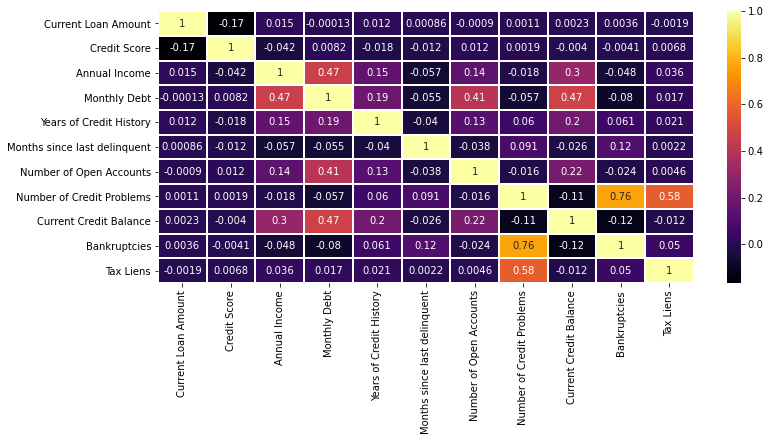

In [30]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidths=1)

In [31]:
df['Maximum Open Credit'].unique()

array([16056, 19149, 28335, ..., 55520, 37004, 62371], dtype=object)

In [32]:
df['Current Loan Amount']=df["Current Loan Amount"].apply(lambda x: df["Current Loan Amount"].median() if x >=99999999 else x) 
df['Credit Score']=df['Credit Score'].apply(lambda x: x/10 if x>800 else x) 
df["Credit Score"]=df["Credit Score"].fillna(df["Credit Score"].median()) 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       215700 non-null  object 
 1   Customer ID                   215700 non-null  object 
 2   Loan Status                   215700 non-null  object 
 3   Current Loan Amount           215700 non-null  float64
 4   Term                          215700 non-null  object 
 5   Credit Score                  215700 non-null  float64
 6   Years in current job          215700 non-null  object 
 7   Home Ownership                215700 non-null  object 
 8   Annual Income                 160692 non-null  float64
 9   Purpose                       215700 non-null  object 
 10  Monthly Debt                  215700 non-null  int32  
 11  Years of Credit History       215700 non-null  float64
 12  Months since last delinquent  97438 non-null

In [34]:
df["Maximum Open Credit"]=df["Maximum Open Credit"].str.extract(r"(\d+)", expand=False).astype("float")

In [35]:
df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median(),inplace=True)
#Tüm kredi kaynakları için maksimum kredi limiti.

In [36]:
df['Bankruptcies'].fillna(df['Bankruptcies'].median(),inplace=True)
df['Tax Liens'].fillna(df['Tax Liens'].median(),inplace=True)

In [37]:
#df['Number of Open Accounts']=df['Number of Open Accounts'].fillna(df['Number of Open Accounts'].median(),inplace=True)
#df['Number of Credit Problems']=df['Number of Credit Problems'].fillna(df['Number of Credit Problems'].median(),inplace=True)

In [38]:
#df['Number of Open Accounts'].astype(float)

In [39]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                    55008
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    118262
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                         0
Tax Liens                            0
dtype: int64

In [40]:
df['Years in current job']=df['Years in current job'].fillna(df['Years in current job'].median())

In [41]:
df['Years in current job'].astype(int)

0         10
1          4
2         10
3         10
4          4
          ..
256977    10
256979     2
256980    10
256981     9
256983    10
Name: Years in current job, Length: 215700, dtype: int32

In [42]:
df['Annual Income']=df['Annual Income'].fillna(df['Annual Income'].median())

In [43]:
df['Months since last delinquent']=df['Months since last delinquent'].fillna(df['Months since last delinquent'].median())

In [44]:
df["Maximum Open Credit"].astype(float)

0         21983.0
1         21983.0
2         21983.0
3         21983.0
4         21983.0
           ...   
256977    21983.0
256979    21983.0
256980    21983.0
256981    21983.0
256983    21983.0
Name: Maximum Open Credit, Length: 215700, dtype: float64

In [45]:
df["Maximum Open Credit"]=df["Maximum Open Credit"].fillna(df["Maximum Open Credit"].median())

In [46]:
df["Maximum Open Credit"].astype(int)

0         21983
1         21983
2         21983
3         21983
4         21983
          ...  
256977    21983
256979    21983
256980    21983
256981    21983
256983    21983
Name: Maximum Open Credit, Length: 215700, dtype: int32

In [47]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       215700 non-null  object 
 1   Customer ID                   215700 non-null  object 
 2   Loan Status                   215700 non-null  object 
 3   Current Loan Amount           215700 non-null  float64
 4   Term                          215700 non-null  object 
 5   Credit Score                  215700 non-null  float64
 6   Years in current job          215700 non-null  object 
 7   Home Ownership                215700 non-null  object 
 8   Annual Income                 215700 non-null  float64
 9   Purpose                       215700 non-null  object 
 10  Monthly Debt                  215700 non-null  int32  
 11  Years of Credit History       215700 non-null  float64
 12  Months since last delinquent  215700 non-nul

In [49]:
df['Maximum Open Credit'].astype(int)
df['Months since last delinquent'].astype(int)
df['Years of Credit History'].astype(int)
df['Current Loan Amount'].astype(int)
df['Annual Income'].astype(int)
df['Credit Score'].astype(int)

0         741
1         734
2         747
3         747
4         746
         ... 
256977    717
256979    732
256980    737
256981    746
256983    678
Name: Credit Score, Length: 215700, dtype: int32

In [50]:
df['Bankruptcies'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
256977    1
256979    0
256980    0
256981    0
256983    0
Name: Bankruptcies, Length: 215700, dtype: int32

In [51]:
df['Tax Liens'].astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
256977    0
256979    0
256980    0
256981    0
256983    0
Name: Tax Liens, Length: 215700, dtype: int32

In [52]:
df['Loan Status']=df['Loan Status'].replace('Fully Paid',1).replace('Charged Off',0)

In [53]:
df.drop(['Loan ID','Customer ID'],axis=1,inplace=True)

In [54]:
df=pd.get_dummies(df,drop_first=True)
x=df.drop(['Loan Status'],axis=1)
y=df['Loan Status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=.01,max_depth=6, random_state=42)
gbcmodel=gbc.fit(x_train,y_train)

print("gbc score: " ,gbc.score(x_test,y_test)) 

gbc score:  0.8173852573018081


In [56]:
from pycaret.classification import *
exp_name=setup(data=df,target='Loan Status')
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8187,0.7436,0.9942,0.8216,0.8997,0.0406,0.0977,5.2510
lightgbm,Light Gradient Boosting Machine,0.8186,0.7468,0.9926,0.8224,0.8995,0.0482,0.1051,0.6130
catboost,CatBoost Classifier,0.8183,0.7472,0.9858,0.8258,0.8987,0.0798,0.1337,21.2730
ada,Ada Boost Classifier,0.8182,0.7339,0.9932,0.8217,0.8994,0.0418,0.0955,1.6020
lr,Logistic Regression,0.8177,0.6055,0.9999,0.8177,0.8997,0.0000,0.0007,0.6510
ridge,Ridge Classifier,0.8177,0.0000,0.9978,0.8188,0.8995,0.0116,0.0473,0.1000
rf,Random Forest Classifier,0.8165,0.7241,0.9868,0.8237,0.8979,0.0599,0.1071,3.9640
xgboost,Extreme Gradient Boosting,0.8165,0.7410,0.9829,0.8258,0.8975,0.0790,0.1264,3.0370
lda,Linear Discriminant Analysis,0.8146,0.6667,0.9855,0.8228,0.8968,0.0513,0.0913,0.3440
et,Extra Trees Classifier,0.8142,0.6824,0.9850,0.8227,0.8966,0.0503,0.0888,5.3010
